In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import models,layers

In [4]:
from IPython.display import HTML

# Set all the Constants

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

# Import data into tensorflow dataset object

We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [6]:
dataset=tf.keras.utils.image_dataset_from_directory(
    'potato',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())        
    #class labels {('Potato___Early_blight' : 0)   ('Potato___Late_blight'  : 1)    ('Potato___healthy'  :2)}

(32, 256, 256, 3)
[1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 2 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0]


In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape) 

(256, 256, 3)


In [10]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0]) 

tf.Tensor(
[[[134. 136. 149.]
  [148. 150. 163.]
  [140. 142. 154.]
  ...
  [112. 112. 124.]
  [128. 128. 140.]
  [129. 129. 141.]]

 [[150. 152. 165.]
  [154. 156. 169.]
  [150. 152. 164.]
  ...
  [124. 124. 136.]
  [136. 136. 148.]
  [127. 127. 139.]]

 [[144. 146. 159.]
  [134. 136. 149.]
  [139. 141. 153.]
  ...
  [151. 151. 161.]
  [159. 159. 169.]
  [144. 144. 154.]]

 ...

 [[218. 216. 227.]
  [199. 197. 208.]
  [192. 190. 201.]
  ...
  [169. 167. 180.]
  [168. 166. 179.]
  [171. 169. 182.]]

 [[209. 207. 218.]
  [191. 189. 200.]
  [193. 191. 202.]
  ...
  [172. 170. 183.]
  [172. 170. 183.]
  [174. 172. 185.]]

 [[230. 228. 239.]
  [204. 202. 213.]
  [191. 189. 200.]
  ...
  [177. 175. 188.]
  [178. 176. 189.]
  [179. 177. 190.]]], shape=(256, 256, 3), dtype=float32)


In [11]:
for a in dataset.take(1):
    print(a)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[139., 133., 137.],
         [141., 135., 139.],
         [144., 138., 142.],
         ...,
         [167., 161., 165.],
         [170., 164., 168.],
         [174., 168., 172.]],

        [[135., 129., 133.],
         [140., 134., 138.],
         [146., 140., 144.],
         ...,
         [165., 159., 163.],
         [168., 162., 166.],
         [172., 166., 170.]],

        [[132., 126., 130.],
         [140., 134., 138.],
         [147., 141., 145.],
         ...,
         [161., 155., 159.],
         [163., 157., 161.],
         [166., 160., 164.]],

        ...,

        [[129., 118., 122.],
         [129., 118., 122.],
         [131., 120., 124.],
         ...,
         [170., 164., 166.],
         [165., 159., 161.],
         [175., 169., 171.]],

        [[126., 115., 119.],
         [129., 118., 122.],
         [132., 121., 125.],
         ...,
         [173., 167., 169.],
         [161., 155., 157.],
       

In [12]:
len(dataset)                #every element in dataset is batch of 32 dataset

68

In [13]:
68*32                        #last elemnt has less than 32

2176

# Visulisation

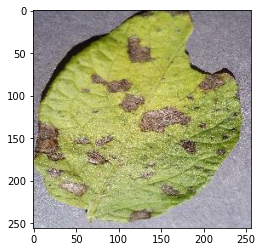

In [14]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))                      #new everytime because, it is shuffling

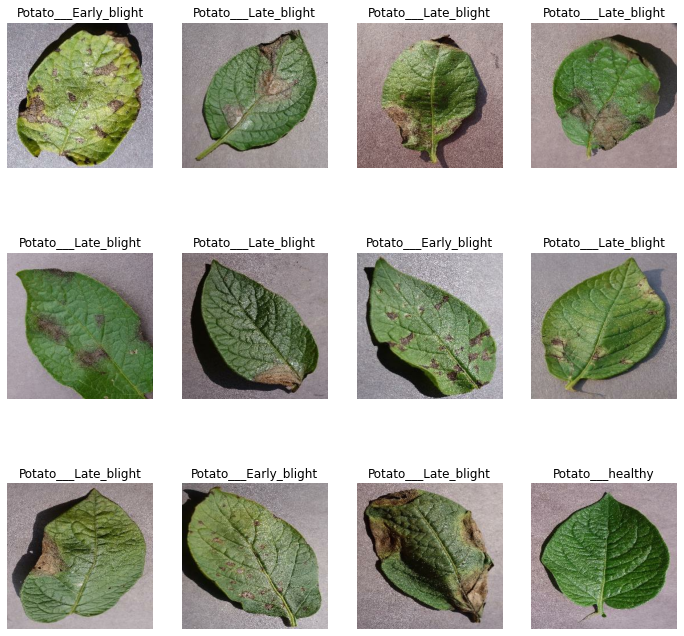

In [15]:
plt.figure(figsize=(12,12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Train_Test_split

#### Dataset should be bifurcated into 3 subsets, namely:

#Training: Dataset to be used while training
#Validation: Dataset to be tested against while training
#Test: Dataset to be tested against after we trained a model

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

# Cache, Shuffle, and Prefetch the Dataset

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# resize_and_rescale

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [22]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

# Data Augmentation

In [23]:
Data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)   
    
    #factor: a float represented as fraction of 2 Pi, or a tuple of size 2
    #representing lower and upper bound for rotating clockwise and
    #counter-clockwise. A positive values means rotating counter clock-wise,
    #while a negative value means clock-wise. When represented as a single
    #float, this value is used for both the upper and lower bound. For
    #instance, `factor=(-0.2, 0.3)` results in an output rotation by a random
    #amount in the range `[-20% * 2pi, 30% * 2pi]`. `factor=0.2` results in an
    #output rotating by a random amount in the range `[-20% * 2pi, 20% * 2pi]`.
])

# Model Building

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model= models.Sequential([
    resize_and_rescale,
    Data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

# Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50


C:\Users\Rohit\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 121s 2s/step - loss: 0.9151 - accuracy: 0.4728 - val_loss: 0.8601 - val_accuracy: 0.5312
Epoch 2/50
54/54 [==============================] - 102s 2s/step - loss: 0.7228 - accuracy: 0.6609 - val_loss: 0.6381 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 102s 2s/step - loss: 0.5298 - accuracy: 0.7830 - val_loss: 0.3562 - val_accuracy: 0.8385
Epoch 4/50
54/54 [==============================] - 102s 2s/step - loss: 0.3439 - accuracy: 0.8536 - val_loss: 0.4414 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 103s 2s/step - loss: 0.2296 - accuracy: 0.8993 - val_loss: 0.2217 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 101s 2s/step - loss: 0.3065 - accuracy: 0.8779 - val_loss: 0.3356 - val_accuracy: 0.8698
Epoch 7/50
54/54 [==============================] - 102s 2s/step - loss: 0.2787 - accuracy: 0.8976 - val_loss: 0.2032 - val_accuracy: 0.9271
Epoch 8/50
54/54 [======

In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 378ms/step - loss: 0.1198 - accuracy: 0.9492


In [29]:
scores

[0.11979560554027557, 0.94921875]

You can see above that we get 98.00% accuracy for our test dataset. This is considered to be a pretty good accuracy

# Plotting the Accuracy and Loss Curves

In [30]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [31]:
history.params                 #verbose== for showing intermidiate steps

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
type(history.history['loss'])

list

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

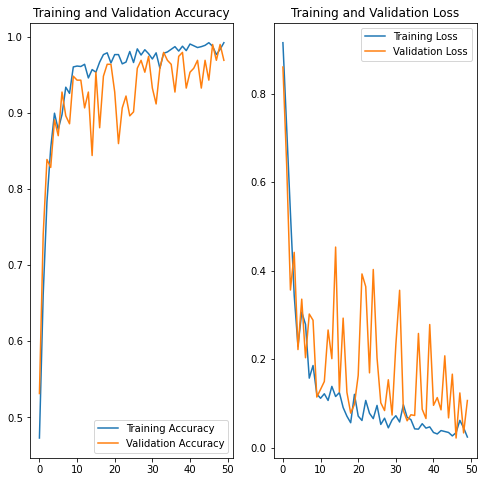

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 1s 1s/step
predicted label: Potato___healthy


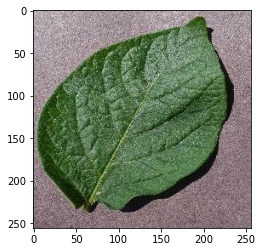

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
ans=model.predict(test_ds)

8/8 [==============================] - 3s 384ms/step


In [38]:
ans.shape

(256, 3)

In [39]:
p=ans[2,:]
[index for index, item in enumerate(p) if item==max(p)][0]

0

In [40]:
y_predict=[]
for i in range(ans.shape[0]):
    y_predict.append([index for index, item in enumerate(ans[i,:]) if item==max(ans[i,:])][0])

In [41]:
print(len(y_predict))
y_predict

256


[1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,


In [42]:
for images_batch, labels_batch in test_ds:
    
    image = images_batch.numpy().astype('uint8')
    label = labels_batch.numpy()

In [43]:
label

array([2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

# Write a function for inference

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Now run inference on few sample images

1/1 [==============================] - 0s 24ms/step


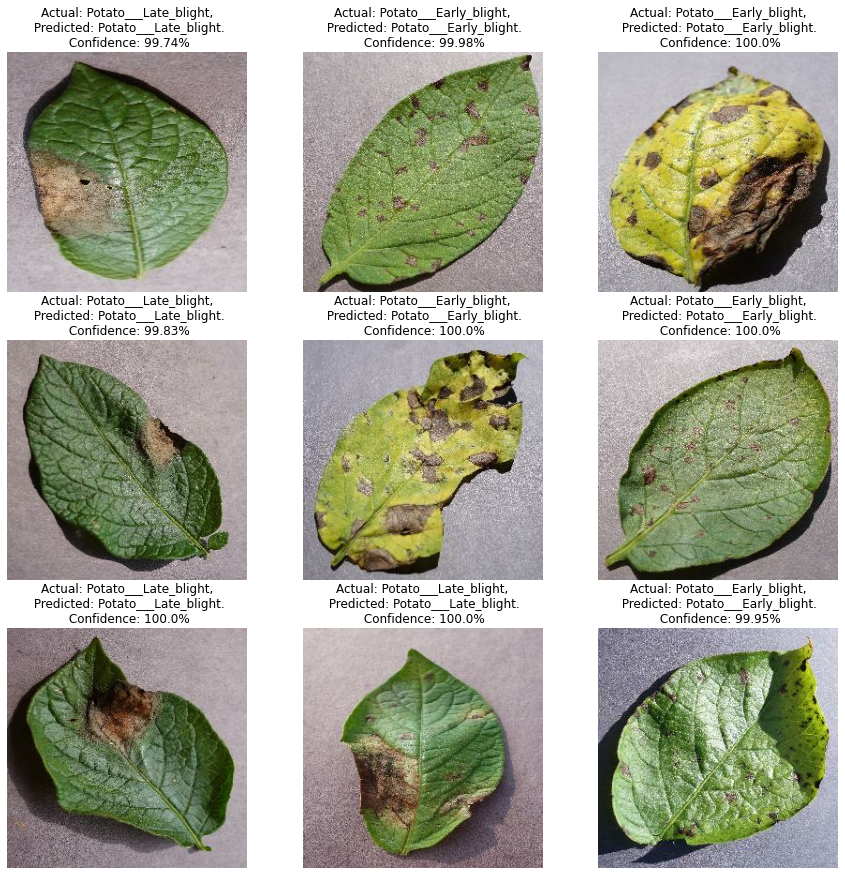

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")